In [26]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
# import pygmt
import numpy as np
import datetime as dt

In [27]:
df_ctd=pd.read_csv('/fs/site5/eccc/crd/ccrn/users/rpg002/stat_downscaling-workshop/data/lineP_ctds/lineP_CTD_training.csv',skiprows=24)
df_ctd['Sta']=[int(el[1:]) for el in df_ctd.STATION_ID.values[:]]
df_ctd['tdt']=[dt.datetime.strptime(el,'%Y-%m-%d %H:%M:%S') for el in df_ctd.TIME]
df_ctd['YM']=[f"{el.year}{el.month:02}" for el in df_ctd['tdt']]
df_ctd['hasT']=[1 if el>0 else 0 for el in df_ctd['TEMPERATURE']]
df_ctd

,STATION_ID,TIME,LATITUDE,LONGITUDE,DEPTH,PRESSURE,PRESSURE_BIN_CNTR,TEMPERATURE,SALINITY,OXYGEN_MMOL_M3,OXYGEN_UMOL_KG,Sta,tdt,YM,hasT
0,P26,1969-08-26 22:18:00,50.000000,-145.00000,0.000000,0.000000,0.5,12.3000,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
1,P26,1969-08-26 22:18:00,50.000000,-145.00000,5.000000,5.043289,5.5,12.1500,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
2,P26,1969-08-26 22:18:00,50.000000,-145.00000,10.000000,10.086701,10.5,12.1200,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
3,P26,1969-08-26 22:18:00,50.000000,-145.00000,32.000000,32.279182,32.5,8.5000,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
4,P26,1969-08-26 22:18:00,50.000000,-145.00000,35.000000,35.305614,35.5,7.8000,32.5400,NaN,NaN,26,1969-08-26 22:18:00,196908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233798,P17,2020-02-13 12:39:40,49.350166,-135.66684,1974.521684,2001.000000,2001.5,1.9819,34.5800,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233799,P17,2020-02-13 12:39:40,49.350166,-135.66684,1975.503826,2002.000000,2002.5,1.9802,34.5804,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233800,P17,2020-02-13 12:39:40,49.350166,-135.66684,1976.485963,2003.000000,2003.5,1.9801,34.5804,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233801,P17,2020-02-13 12:39:40,49.350166,-135.66684,1977.468096,2004.000000,2004.5,1.9800,34.5805,53.52,52.0,17,2020-02-13 12:39:40,202002,1


In [28]:
dfctd1=df_ctd.loc[df_ctd.hasT>0,['Sta','YM','LONGITUDE','LATITUDE']].groupby(['Sta','YM']).mean().reset_index().groupby('Sta').agg(
    N=pd.NamedAgg(column="YM", aggfunc="count"),
    lat=pd.NamedAgg(column="LATITUDE", aggfunc="mean"),
    lon=pd.NamedAgg(column="LONGITUDE", aggfunc="mean"))

In [30]:
dfctd1

,N,lat,lon
Sta,,,
4,128,48.649902,-126.666532
5,101,48.691993,-127.166304
6,124,48.743247,-127.666420
7,109,48.776601,-128.166435
8,119,48.816668,-128.666679
9,113,48.856554,-129.166098
10,116,48.893238,-129.666533
11,109,48.933311,-130.166603
12,115,48.969913,-130.666538


In [ ]:
#points1 = pygmt.project(center=[-126.67,48.65], endpoint=[-145,50], generate=.33) #true station end points
# points1 = pygmt.project(center=[-144.9,50], endpoint=[-126.6,48.65], generate=.333)

In [75]:
npoints=38*3
lats=np.linspace(50,48.65,npoints)
lons=np.linspace(-145,-126.7,npoints)
print(lats)


# npoints=38*5
# lats=np.linspace(50,48.65,npoints)
# lons=np.linspace(-143.6,-126.7,npoints)
# print(lats)

# lats2=np.linspace(50,48.65,npoints)
# lons2=np.linspace(-145,-143.6,npoints)

[50.         49.9880531  49.97610619 49.96415929 49.95221239 49.94026549
 49.92831858 49.91637168 49.90442478 49.89247788 49.88053097 49.86858407
 49.85663717 49.84469027 49.83274336 49.82079646 49.80884956 49.79690265
 49.78495575 49.77300885 49.76106195 49.74911504 49.73716814 49.72522124
 49.71327434 49.70132743 49.68938053 49.67743363 49.66548673 49.65353982
 49.64159292 49.62964602 49.61769912 49.60575221 49.59380531 49.58185841
 49.5699115  49.5579646  49.5460177  49.5340708  49.52212389 49.51017699
 49.49823009 49.48628319 49.47433628 49.46238938 49.45044248 49.43849558
 49.42654867 49.41460177 49.40265487 49.39070796 49.37876106 49.36681416
 49.35486726 49.34292035 49.33097345 49.31902655 49.30707965 49.29513274
 49.28318584 49.27123894 49.25929204 49.24734513 49.23539823 49.22345133
 49.21150442 49.19955752 49.18761062 49.17566372 49.16371681 49.15176991
 49.13982301 49.12787611 49.1159292  49.1039823  49.0920354  49.0800885
 49.06814159 49.05619469 49.04424779 49.03230088 49.

Text(0.5, 1.0, 'Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')

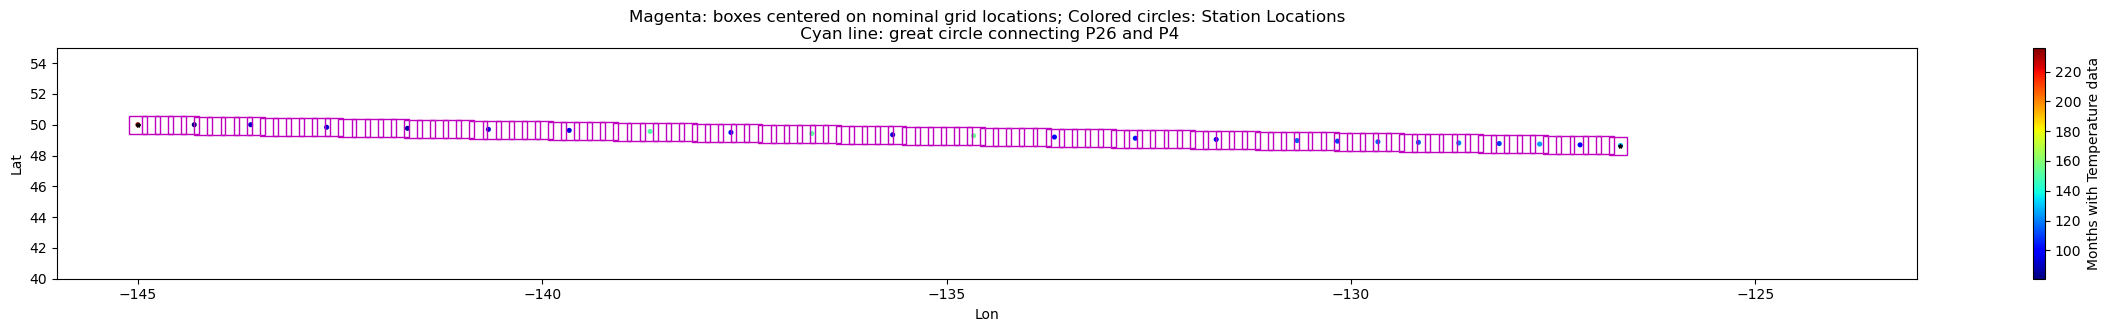

In [76]:
fig,ax=plt.subplots(1,1,figsize=(30,3))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
# ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-146,-123)
ax.set_ylim(40,55)
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
#fig.savefig('gridbasis.png',bbox_inches='tight',dpi=100)

In [77]:
np.diff(lons)

array([0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469, 0.1619469,
       0.1619469, 0.1619469, 0.1619469, 0.1619469, 

In [78]:
#dx=.5*np.cosd(50) %.5 degrees lon in km/111
#dxlatdeg=.5*np.cosd(50)
dylat=np.diff(lons)[0]*np.cos(np.pi*50/180)

In [79]:
dylat

0.1040974624536662

In [80]:
lats[0]

50.0

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 35]


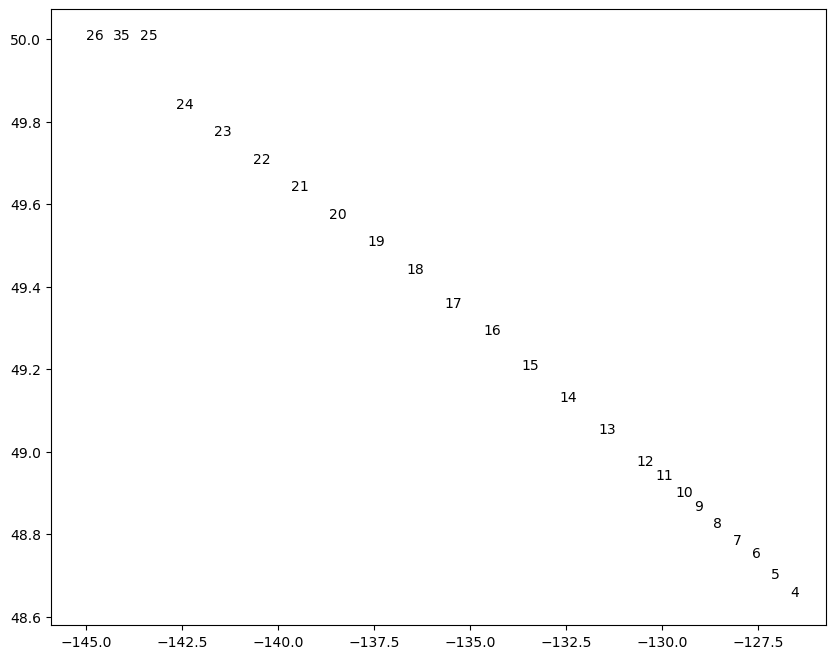

In [81]:
stations=df_ctd.Sta.unique()
print(sorted(stations))
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(df_ctd.LONGITUDE,df_ctd.LATITUDE,'w.',alpha=.2)
for ist in stations:
    lo,la=df_ctd.loc[df_ctd.Sta==ist,['LONGITUDE','LATITUDE']].values[0,:]
    ax.annotate(f"{ist}",xy=[lo,la],xycoords='data')

In [82]:
glon=np.expand_dims(lons,axis=0)
glat=np.expand_dims(lats,axis=0)
lonedges_lo=np.empty(npoints)
lonedges_hi=np.empty(npoints)
lonedges_lo[0]=lons[0]-(lons[1]-lons[0])/2
lonedges_lo[1:]=(lons[:-1]+lons[1:])/2
lonedges_hi[:-1]=(lons[:-1]+lons[1:])/2
lonedges_hi[-1]=lons[-1]+(lons[-1]-lons[-2])/2
latedges_lo=lats-dylat/2
latedges_hi=lats+dylat/2

Text(0.5, 1.0, 'Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')

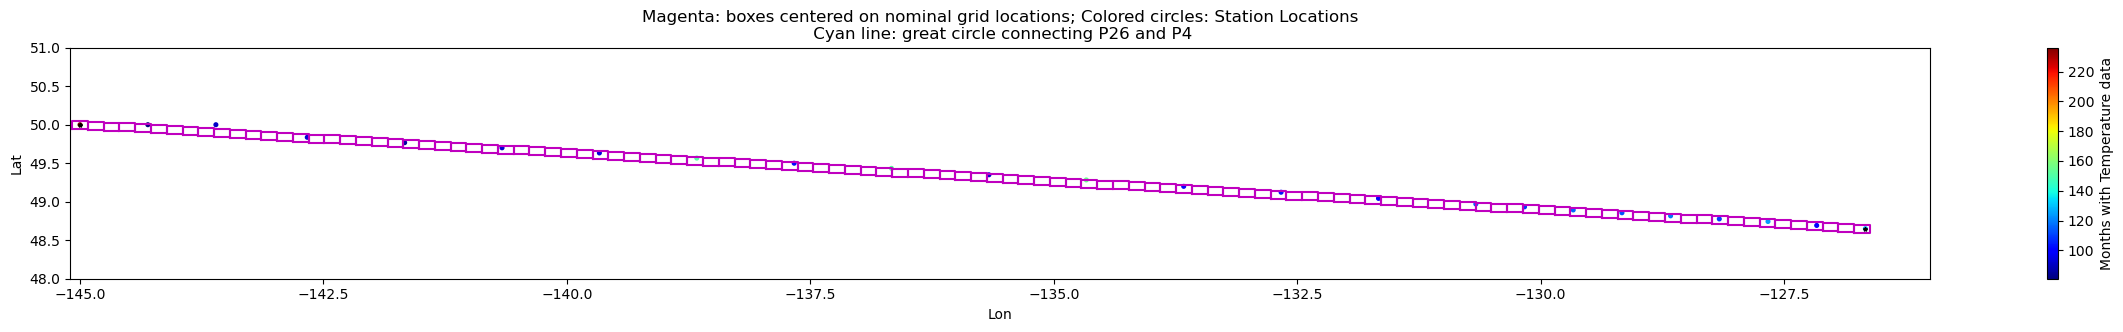

In [83]:
fig,ax=plt.subplots(1,1,figsize=(30,3))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
#ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
for ii in range(0,npoints):
    ax.plot([lonedges_lo[ii],lonedges_lo[ii],lonedges_hi[ii],lonedges_hi[ii],lonedges_lo[ii]],
            [latedges_lo[ii],latedges_hi[ii],latedges_hi[ii],latedges_lo[ii],latedges_lo[ii]],'m-')
#ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-145.1,-126)
ax.set_ylim(48,51)
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
# fig.savefig('gridbasisHiRes.png',bbox_inches='tight',dpi=100)

In [84]:
lats

array([50.        , 49.9880531 , 49.97610619, 49.96415929, 49.95221239,
       49.94026549, 49.92831858, 49.91637168, 49.90442478, 49.89247788,
       49.88053097, 49.86858407, 49.85663717, 49.84469027, 49.83274336,
       49.82079646, 49.80884956, 49.79690265, 49.78495575, 49.77300885,
       49.76106195, 49.74911504, 49.73716814, 49.72522124, 49.71327434,
       49.70132743, 49.68938053, 49.67743363, 49.66548673, 49.65353982,
       49.64159292, 49.62964602, 49.61769912, 49.60575221, 49.59380531,
       49.58185841, 49.5699115 , 49.5579646 , 49.5460177 , 49.5340708 ,
       49.52212389, 49.51017699, 49.49823009, 49.48628319, 49.47433628,
       49.46238938, 49.45044248, 49.43849558, 49.42654867, 49.41460177,
       49.40265487, 49.39070796, 49.37876106, 49.36681416, 49.35486726,
       49.34292035, 49.33097345, 49.31902655, 49.30707965, 49.29513274,
       49.28318584, 49.27123894, 49.25929204, 49.24734513, 49.23539823,
       49.22345133, 49.21150442, 49.19955752, 49.18761062, 49.17

In [85]:
def haversine(la0,lo0,la1,lo1):
    """ haversine formula with numpy array handling
    Calculates spherical distance between points on Earth in meters
    Compares elements of (la0,lo0) with (la1,lo1)
    Shapes must be compatible with numpy array broadcasting
    args: lats and lons in decimal degrees
    returns: distance on sphere with volumetric mean Earth radius in meters
    """
    rEarth=6371*1e3 # 
    # convert to radians
    la0=np.radians(la0)
    la1=np.radians(la1)
    lo0=np.radians(lo0)
    lo1=np.radians(lo1)
    theta=2*np.arcsin(np.sqrt(np.sin((la0-la1)/2)**2+np.cos(la0)*np.cos(la1)*np.sin((lo0-lo1)/2)**2))
    d=rEarth*theta
    return d

In [86]:
gridSpecs=pd.DataFrame(data=np.concatenate((glon,glat),axis=0).transpose(),columns=['nom_lon','nom_lat'],index=np.arange(0,npoints))
gridSpecs

,nom_lon,nom_lat
0,-145.000000,50.000000
1,-144.838053,49.988053
2,-144.676106,49.976106
3,-144.514159,49.964159
4,-144.352212,49.952212
...,...,...
109,-127.347788,48.697788
110,-127.185841,48.685841
111,-127.023894,48.673894
112,-126.861947,48.661947


In [87]:
gridSpecs['lonedges_lo']=lonedges_lo
gridSpecs['lonedges_hi']=lonedges_hi
gridSpecs['latedges_lo']=latedges_lo
gridSpecs['latedges_hi']=latedges_hi
gridSpecs['Sta']=None
gridSpecs['StaLon']=None
gridSpecs['StaLat']=None

In [88]:
lo=-129
la=48.8
dist=np.array([haversine(la,lo,la2,lo2) for la2, lo2 in zip(gridSpecs['nom_lat'],gridSpecs['nom_lon'])])
ix=np.argmin(dist)
ix

99

In [89]:
def getgridind(lo,la):
    dist=np.array([haversine(la,lo,la2,lo2) for la2, lo2 in zip(gridSpecs['nom_lat'],gridSpecs['nom_lon'])])
    ix=np.argmin(dist)
    return ix

for sta, irow in dfctd1.iterrows():
    gridind=getgridind(irow['lon'],irow['lat'])
    print(sta,gridind)
    if gridind>=0: 
        gridSpecs.at[gridind,'Sta']=sta
        gridSpecs.at[gridind,'StaLon']=irow['lon']
        gridSpecs.at[gridind,'StaLat']=irow['lat']
    else:
        print('Error:',sta,lat,lon,gridind)

4 113
5 110
6 107
7 104
8 101
9 98
10 95
11 92
12 88
13 82
14 76
15 70
16 64
17 58
18 51
19 45
20 39
21 33
22 27
23 21
24 14
25 9
26 0
35 4


In [90]:
gridSpecs

,nom_lon,nom_lat,lonedges_lo,lonedges_hi,latedges_lo,latedges_hi,Sta,StaLon,StaLat
0,-145.000000,50.000000,-145.080973,-144.919027,49.947951,50.052049,26,-144.999964,50.000064
1,-144.838053,49.988053,-144.919027,-144.757080,49.936004,50.040102,None,None,None
2,-144.676106,49.976106,-144.757080,-144.595133,49.924057,50.028155,None,None,None
3,-144.514159,49.964159,-144.595133,-144.433186,49.912111,50.016208,None,None,None
4,-144.352212,49.952212,-144.433186,-144.271239,49.900164,50.004261,35,-144.303145,50.00018
...,...,...,...,...,...,...,...,...,...
109,-127.347788,48.697788,-127.428761,-127.266814,48.645739,48.749836,None,None,None
110,-127.185841,48.685841,-127.266814,-127.104867,48.633792,48.737889,5,-127.166304,48.691993
111,-127.023894,48.673894,-127.104867,-126.942920,48.621845,48.725943,None,None,None
112,-126.861947,48.661947,-126.942920,-126.780973,48.609898,48.713996,None,None,None


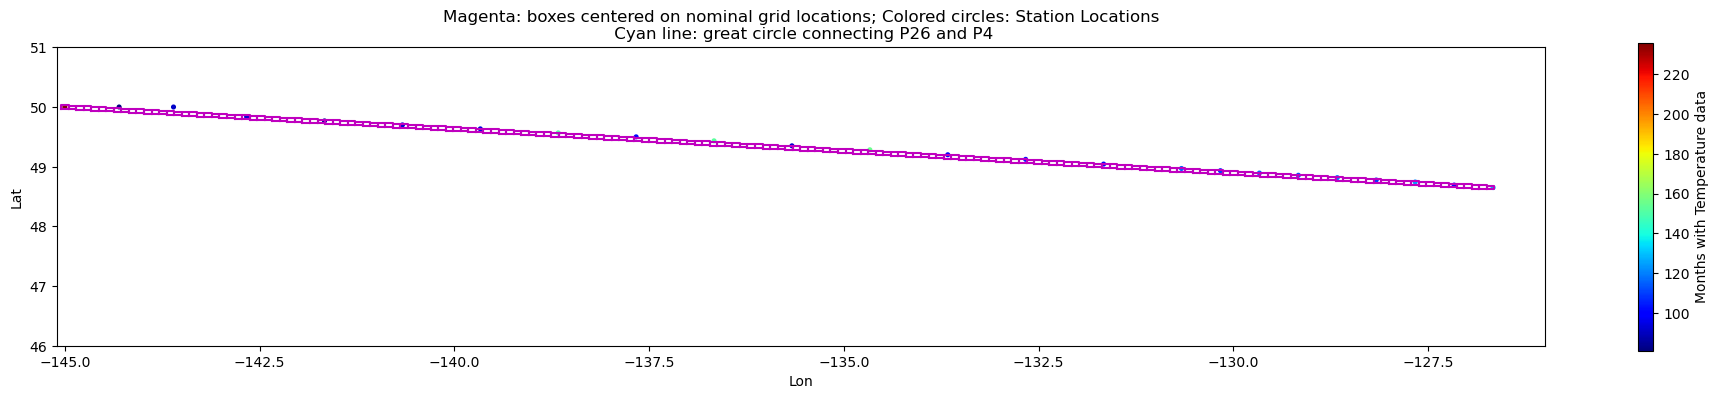

In [50]:
fig,ax=plt.subplots(1,1,figsize=(24,4))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
#ax.plot(-145,50,'k*',ms=3)
#ax.plot(-126.67,48.65,'k*',ms=3)
# ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
for ii in range(0,npoints):
    ax.plot([gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_lo[ii]],
            [gridSpecs.latedges_lo[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_lo[ii],gridSpecs.latedges_lo[ii]],'m-')
#ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-145.1,-126)
ax.set_ylim(46,51)
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
ax.set_aspect(np.sin(50*np.pi/180))
fig.savefig('gridoutHiRes.png',bbox_inches='tight',dpi=100)

In [51]:
gridSpecs

,nom_lon,nom_lat,lonedges_lo,lonedges_hi,latedges_lo,latedges_hi,Sta,StaLon,StaLat
0,-145.000000,50.000000,-145.048413,-144.951587,49.968881,50.031119,26,-144.999964,50.000064
1,-144.903175,49.992857,-144.951587,-144.854762,49.961738,50.023976,None,None,None
2,-144.806349,49.985714,-144.854762,-144.757937,49.954595,50.016833,None,None,None
3,-144.709524,49.978571,-144.757937,-144.661111,49.947452,50.009691,None,None,None
4,-144.612698,49.971429,-144.661111,-144.564286,49.940309,50.002548,None,None,None
...,...,...,...,...,...,...,...,...,...
185,-127.087302,48.678571,-127.135714,-127.038889,48.647452,48.709691,None,None,None
186,-126.990476,48.671429,-127.038889,-126.942063,48.640309,48.702548,None,None,None
187,-126.893651,48.664286,-126.942063,-126.845238,48.633167,48.695405,None,None,None
188,-126.796825,48.657143,-126.845238,-126.748413,48.626024,48.688262,None,None,None


In [52]:
gridSpecs['Index']=gridSpecs.index

In [96]:
gridSpecs.to_csv('gridspecsHiRes.csv')

In [92]:
gridSpecs

,nom_lon,nom_lat,lonedges_lo,lonedges_hi,latedges_lo,latedges_hi,Sta,StaLon,StaLat
0,-145.000000,50.000000,-145.080973,-144.919027,49.947951,50.052049,26,-144.999964,50.000064
1,-144.838053,49.988053,-144.919027,-144.757080,49.936004,50.040102,None,None,None
2,-144.676106,49.976106,-144.757080,-144.595133,49.924057,50.028155,None,None,None
3,-144.514159,49.964159,-144.595133,-144.433186,49.912111,50.016208,None,None,None
4,-144.352212,49.952212,-144.433186,-144.271239,49.900164,50.004261,35,-144.303145,50.00018
...,...,...,...,...,...,...,...,...,...
109,-127.347788,48.697788,-127.428761,-127.266814,48.645739,48.749836,None,None,None
110,-127.185841,48.685841,-127.266814,-127.104867,48.633792,48.737889,5,-127.166304,48.691993
111,-127.023894,48.673894,-127.104867,-126.942920,48.621845,48.725943,None,None,None
112,-126.861947,48.661947,-126.942920,-126.780973,48.609898,48.713996,None,None,None


In [93]:
import numpy as np
.5*111*np.cos(50)

53.55561458131229

In [94]:
glat.shape

(1, 114)

In [98]:
haversine(glat[0,1],glon[0,1],glat[0,0],glon[0,0])

11652.516639149058

Text(0.5, 1.0, 'Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')

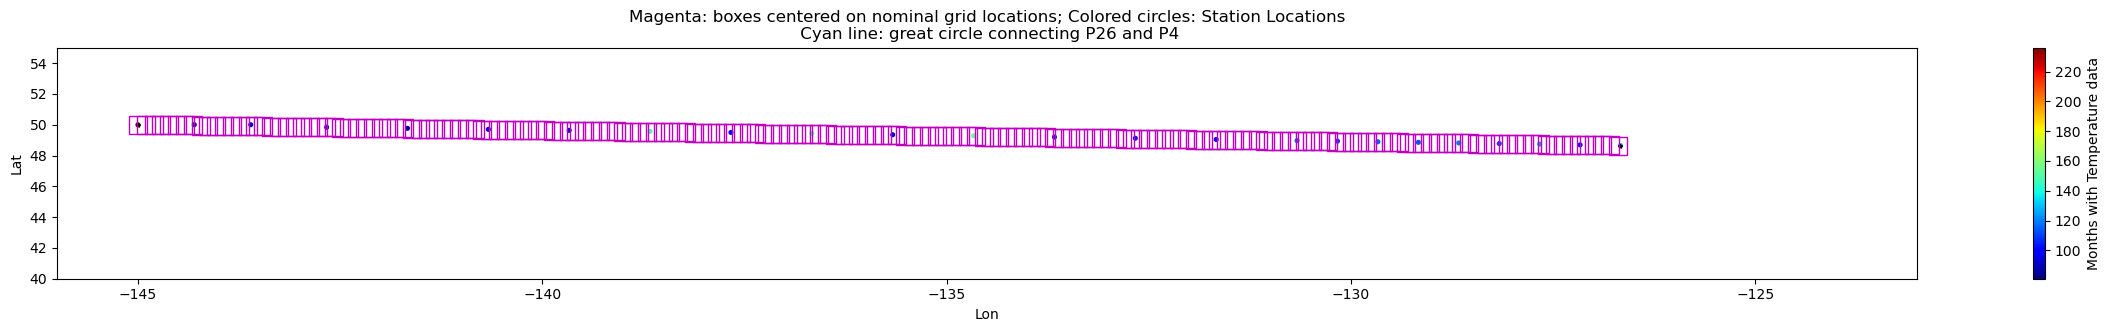

In [61]:
fig,ax=plt.subplots(1,1,figsize=(30,3))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
# ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-146,-123)
ax.set_ylim(40,55)
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
#fig.savefig('gridbasis.png',bbox_inches='tight',dpi=100)

In [62]:
ds = xr.open_dataset('/fs/site5/eccc/crd/ccrn/users/rpg002/stat_downscaling-workshop/data/NEP10k_ROMS/nep_revised_hind_moave_all_subset.nc')

In [66]:
ds['lon_rho'] = ds['lon_rho'] - 360

Text(0.5, 1.0, 'Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')

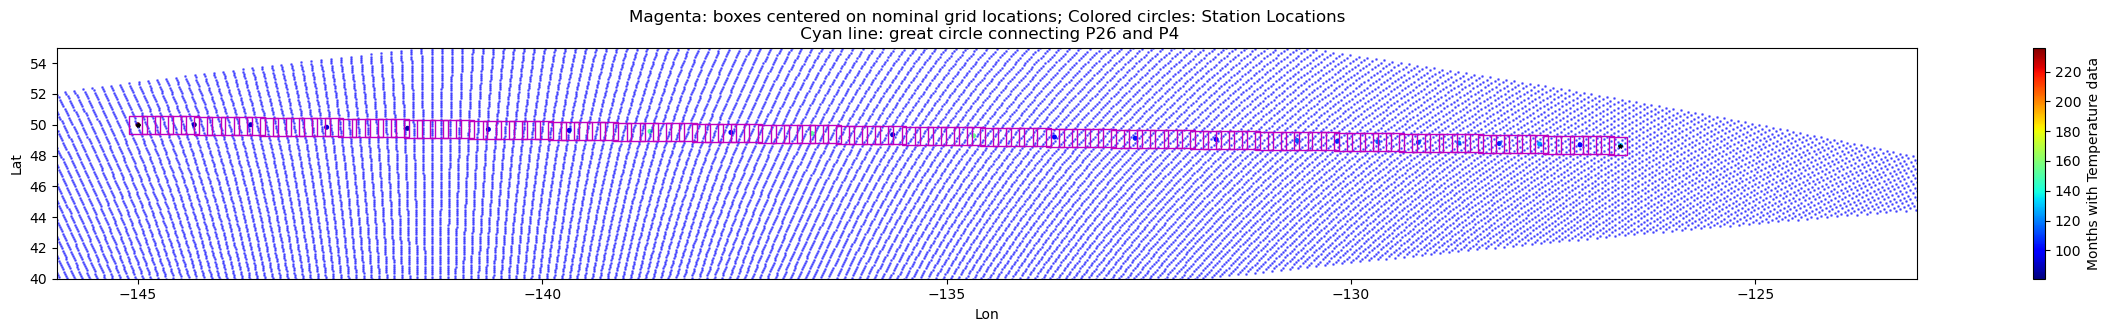

In [97]:
fig,ax=plt.subplots(1,1,figsize=(30,3))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
ax.scatter(ds.lon_rho, ds.lat_rho, alpha = 0.5, color = 'b',s=1)
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
# ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-146,-123)
ax.set_ylim(40,55)
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
#fig.savefig('gridbasis.png',bbox_inches='tight',dpi=100)